In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.21 GB, difference +0.21 GB
scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
home_dir = os.path.expanduser("~")
current_directory = os.getcwd()

adata = sc.read_h5ad(current_directory+"/backups/t_cells_umap_24181x37733_241024_13h05.h5ad")

In [5]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/t_cells_clustering_leiden_1.0_sub_obs_24181x28_241025_13h27.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)

In [6]:
# loading obs onto adata
adata.obs["leiden_1.0_sub"] = obs["leiden_1.0_sub"]
# loading obs onto adata
adata.obs["leiden_1.0"] = obs["leiden_1.0"]

In [7]:
adata.layers["counts"]

<24181x37733 sparse matrix of type '<class 'numpy.float32'>'
	with 30881059 stored elements in Compressed Sparse Row format>

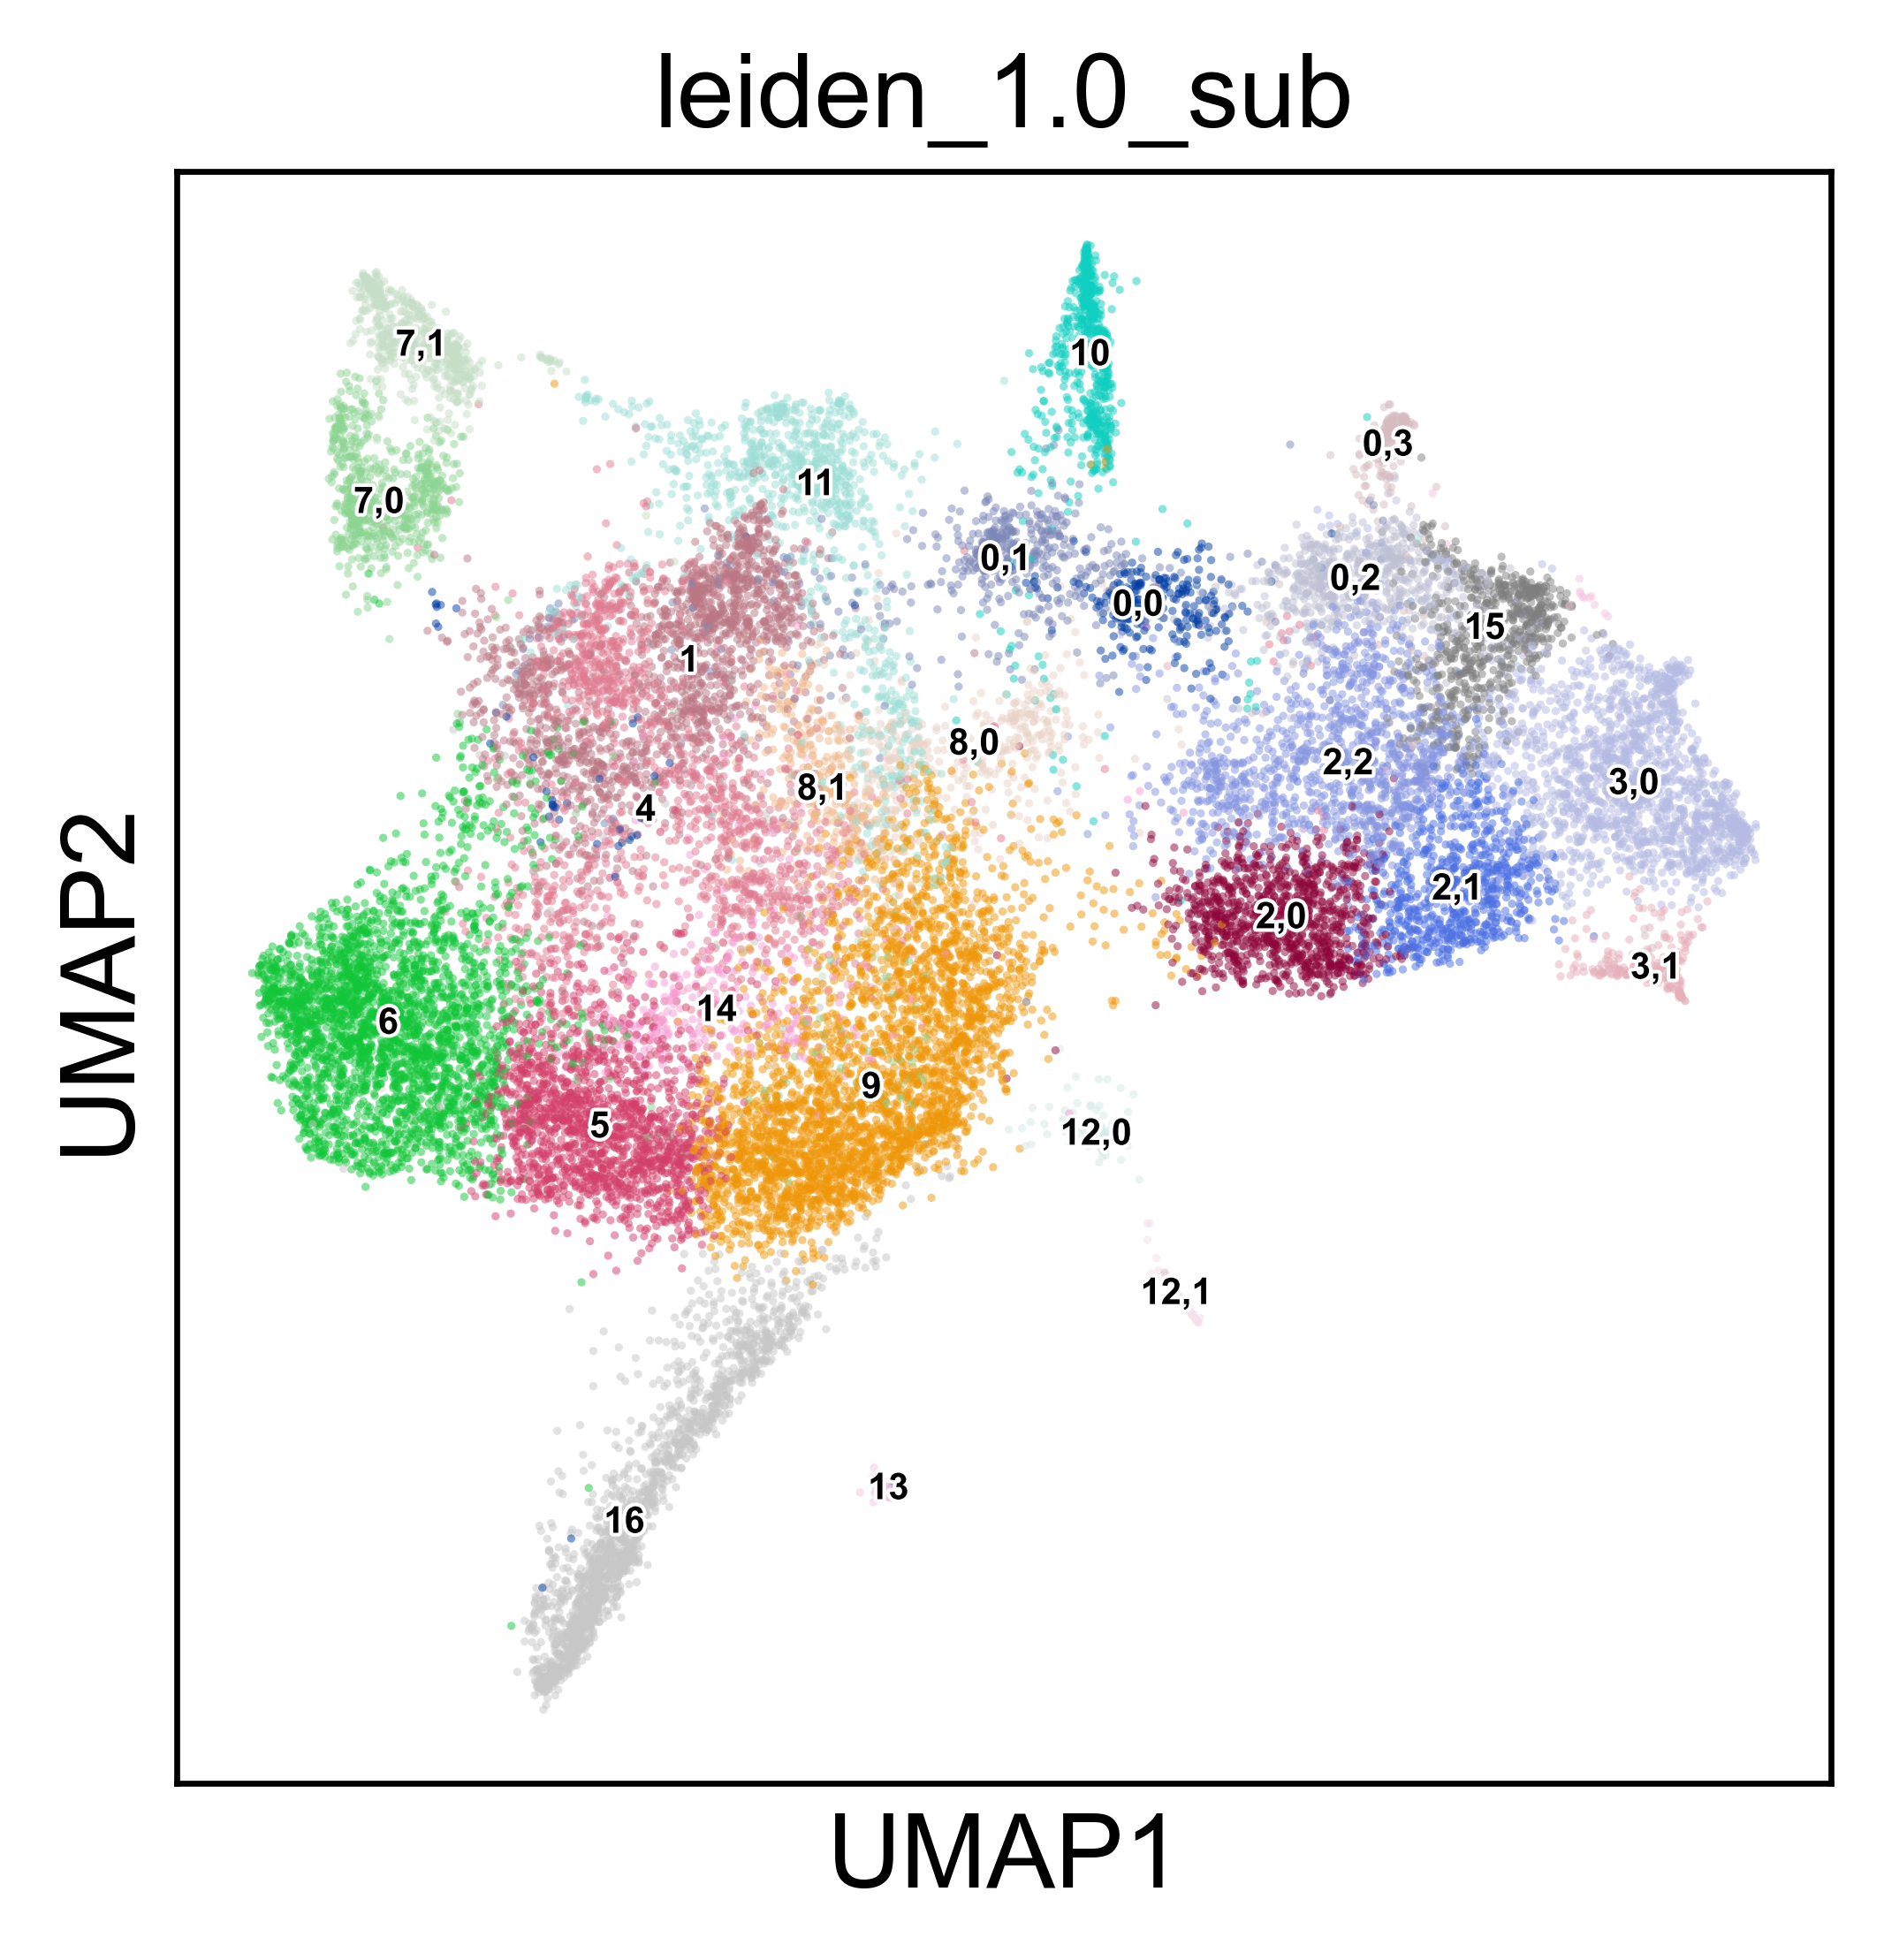

In [177]:
sc.pl.umap(adata, color = ["leiden_1.0_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 5, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [190]:
for i, x in enumerate(adata.obs["leiden_1.0_sub"].unique()): 
    print(f'"{x}":"N/A ({x})",')

"0,0":"N/A (0,0)",
"2,0":"N/A (2,0)",
"4":"N/A (4)",
"0,1":"N/A (0,1)",
"9":"N/A (9)",
"11":"N/A (11)",
"6":"N/A (6)",
"12,0":"N/A (12,0)",
"2,2":"N/A (2,2)",
"7,0":"N/A (7,0)",
"13":"N/A (13)",
"5":"N/A (5)",
"1":"N/A (1)",
"3,0":"N/A (3,0)",
"15":"N/A (15)",
"12,1":"N/A (12,1)",
"10":"N/A (10)",
"0,2":"N/A (0,2)",
"2,1":"N/A (2,1)",
"0,3":"N/A (0,3)",
"7,1":"N/A (7,1)",
"16":"N/A (16)",
"8,0":"N/A (8,0)",
"3,1":"N/A (3,1)",
"14":"N/A (14)",
"8,1":"N/A (8,1)",


In [12]:

cell_type_dict = {

## T cells
"15":"Tem/Temra cytotoxic T cells",
"0,0":"Tem/Temra cytotoxic T cells",
"0,3":"Tem/Temra cytotoxic T cells",
"0,2":"Tem/Temra cytotoxic T cells",
"2,0":"Tem/Temra cytotoxic T cells",
"2,2":"Tem/Temra cytotoxic T cells",


"0,1":"Tem/Effector helper T cells",
"1":"Tem/Effector helper T cells",
"4":"Tem/Effector helper T cells",
"8,0":"Tem/Effector helper T cells",
"8,1":"Tem/Effector helper T cells",
"11":"Tem/Effector helper T cells",
    
"6":"Tcm/Naive helper T cells",
"5":"Tcm/Naive helper T cells",
"9":"Tcm/Naive helper T cells",
"14":"Tcm/Naive helper T cells",
    
"16":"Tcm/Naive cytotoxic T cells",
#"25":"Type 1 helper T cells",
"10":"MAIT T cells",
#"0,0":"MAIT T cells",
    
"7,0":"Regulatory T cells",
"7,1":"Regulatory T cells",
"2,1":"NK cells",
"3,0":"NK cells",
"3,1":"NK cells", # NK CD16 dim

}
#



cell_type_color_palette = {

# green
"Tem/Temra cytotoxic T cells": "#596e32",
"Tem/Effector helper T cells": "#4f9e58",
"Tcm/Naive helper T cells": "#1b544c",
"Tcm/Naive cytotoxic T cells": "#21661e",
"MAIT T cells": "#62a87e", 
"Regulatory T cells": "#44ab89",
"NK cells": "#3bad48",
# "": "#2abf9a",
    
}


In [13]:
adata.obs["cell_type_t"] = adata.obs["leiden_1.0_sub"].map(cell_type_dict).astype("category")

/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


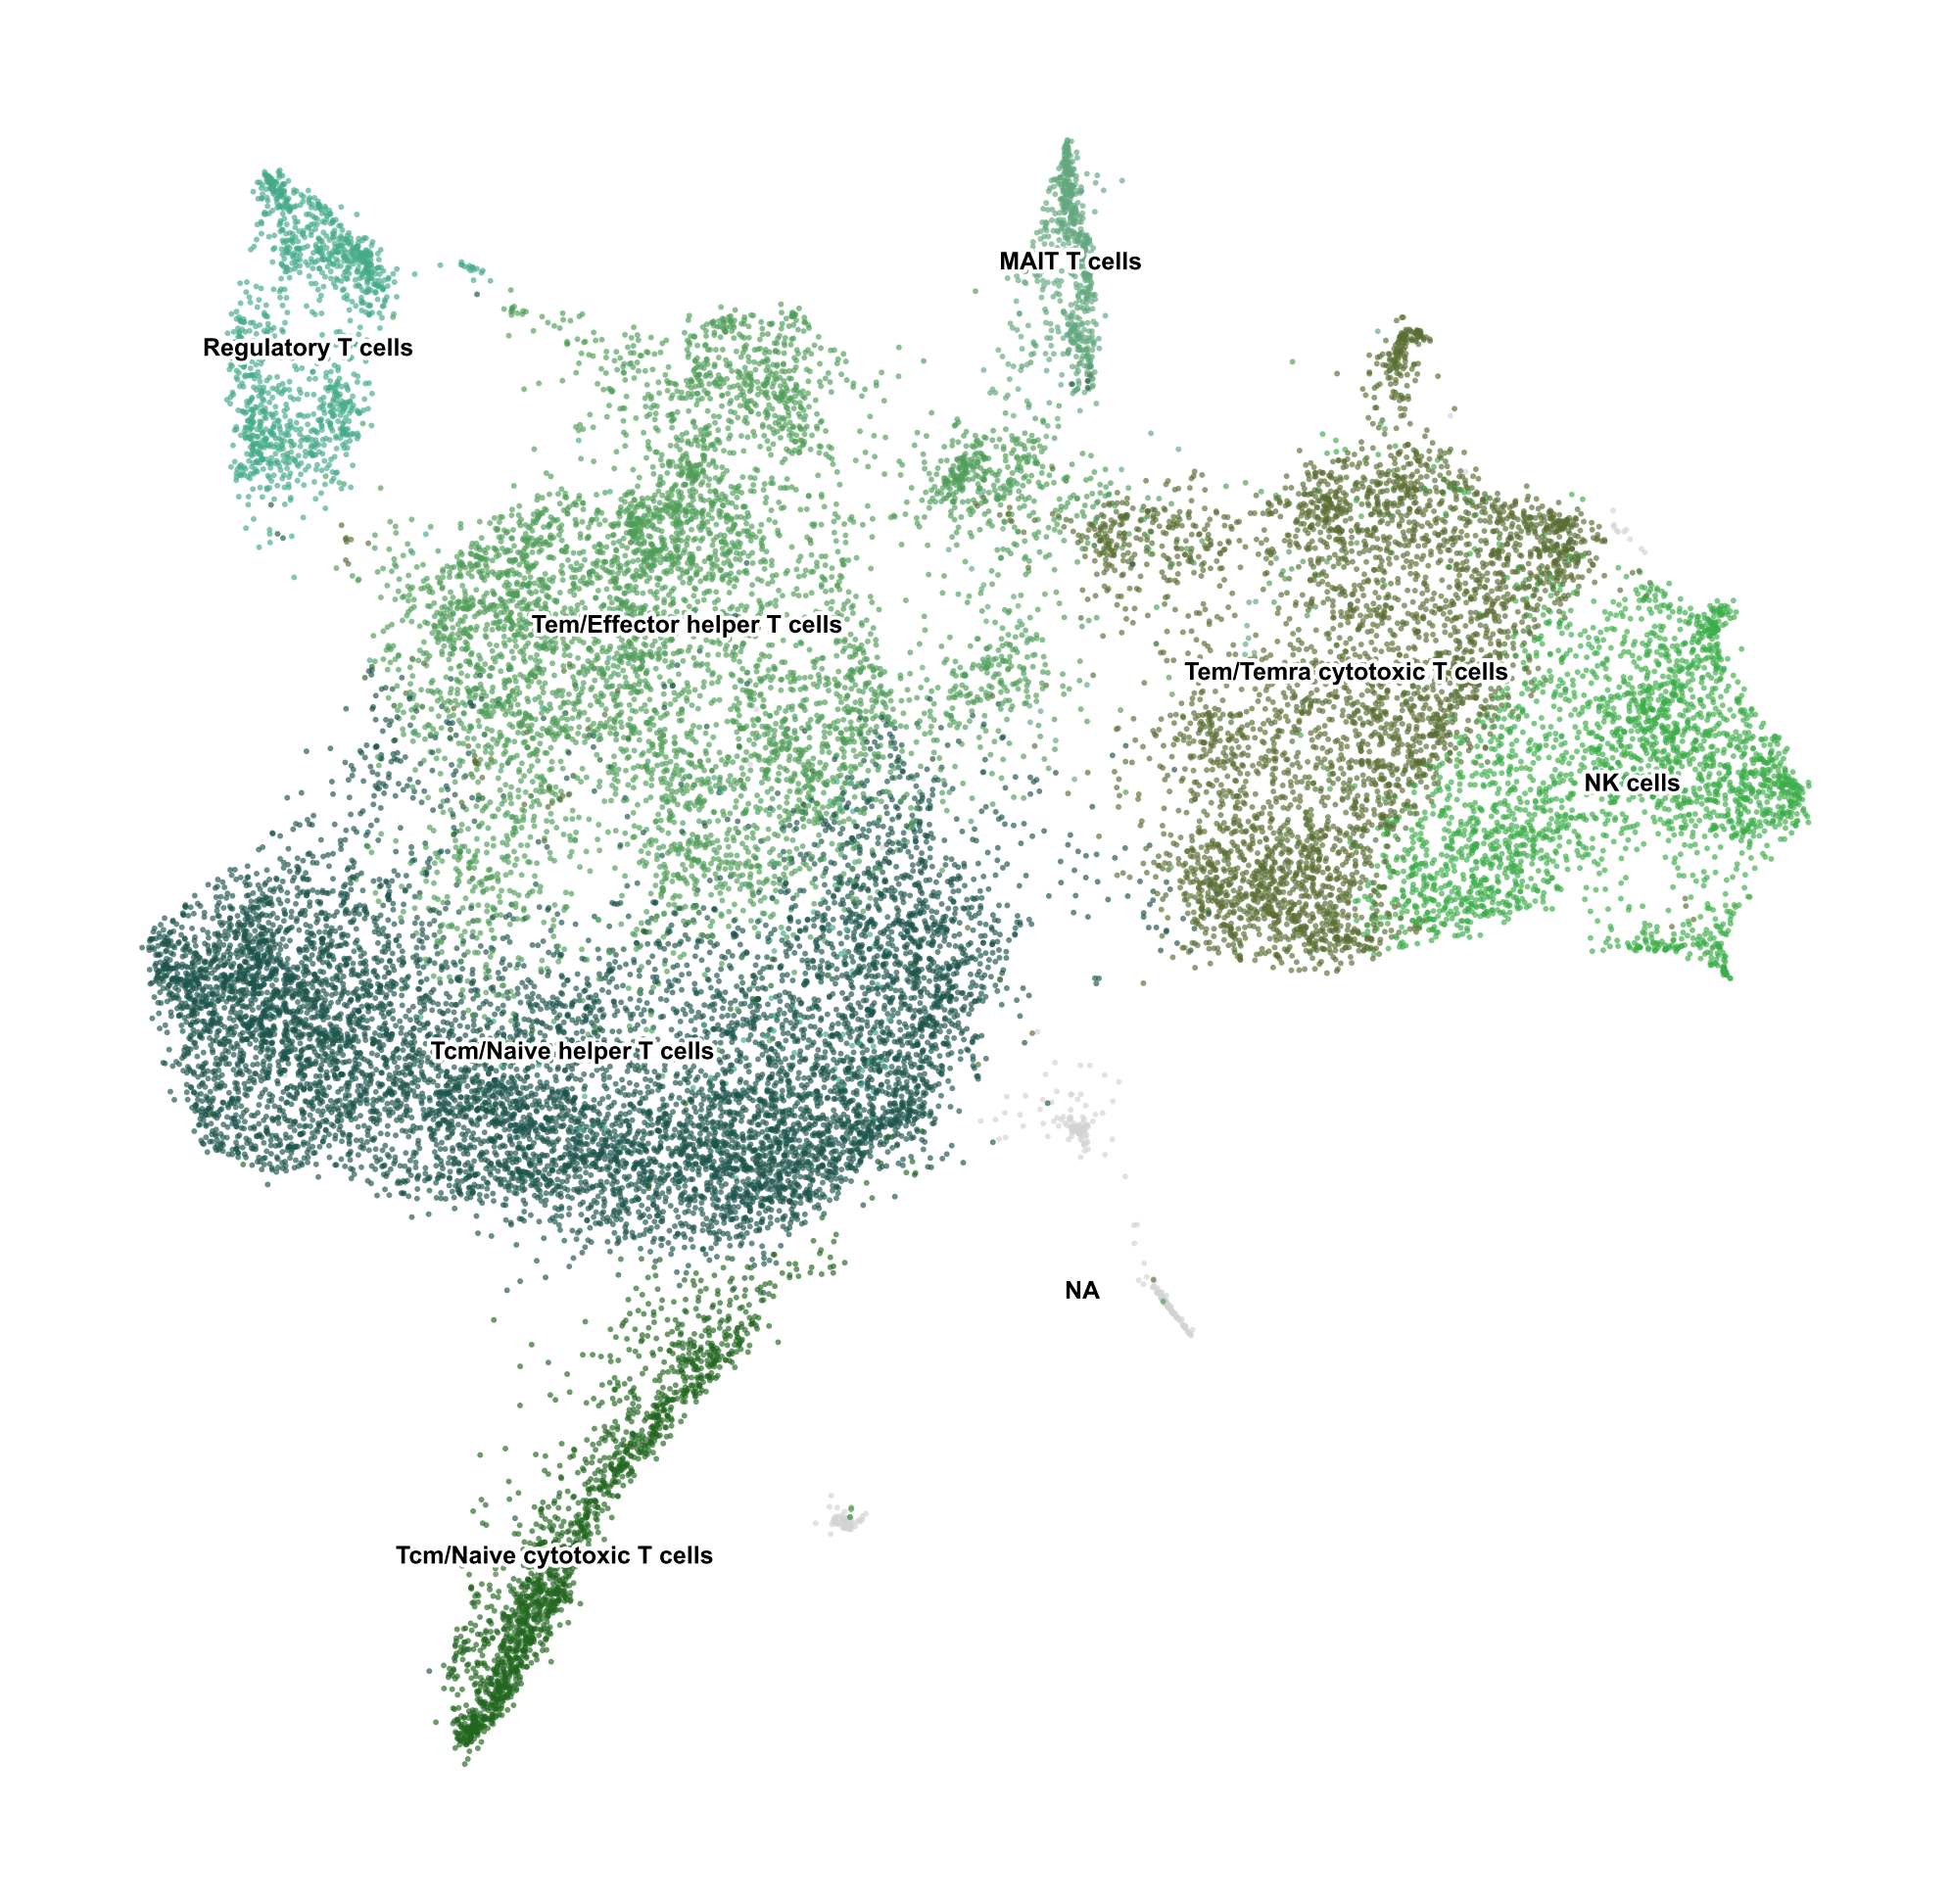

In [15]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type_t", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette,
           save = "_cell_type_only_t_cells.png")

In [60]:
# saving annotated recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/t_cells_1.0_sub_DGE_v1_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_leiden_2.5_sub_DGE_v1_annotation_86447x37733_241024_10h21.h5ad


In [16]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/t_cells_leiden_1.0_sub_annotation_obs_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/t_cells_leiden_1.0_sub_annotation_obs_24181x29_241028_11h57
0.24574804306030273
